In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/bellevue-university/dsc410/main/12%20Week/week_6/data/startups_profit.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,"$192,261.83"
1,162597.70,151377.59,443898.53,California,"$191,792.06"
2,153441.51,101145.55,407934.54,FL,"$191,050.39"
3,144372.41,118671.85,383199.62,New York,"$182,901.99"
4,142107.34,91391.77,366168.42,FL,"$166,187.94"
5,131876.90,99814.71,362861.36,New York,"$156,991.12"
6,134615.46,147198.87,127716.82,California,"$156,122.51"
7,130298.13,145530.06,323876.68,FL,"$155,752.60"
8,120542.52,148718.95,311613.29,New York,"$152,211.77"
9,123334.88,108679.17,304981.62,California,"$149,759.96"


## EDA

1. Rename columns
2. Update profit column value to be regular float and not currency
3. Replace NaN values with median of each column
4. Make each state its own column and replace categorized values with either a 1 or 0

#### 1. Rename columns:

In [ ]:
df = df.rename(columns={'R&D Spend': 'rd_spend',
                        'Administration': 'administration',
                        'Marketing Spend': 'market_spend',
                        'State': 'state',
                        ' Profit ': 'profit'})
df.dtypes

rd_spend          float64
administration    float64
market_spend      float64
state              object
profit             object
dtype: object

#### 2. Update profit column value to be regular float and not currency with nonnumeric characters:

In [ ]:
df['profit'] = df['profit'].str.replace(r'[$,]', '', regex=True).astype('float')
df


,rd_spend,administration,market_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,FL,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,FL,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,FL,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#### 3. Replace NaN values with median of each column:

In [ ]:
df.replace(0, np.nan, inplace=True)

def impute_nan(df, variable, median): # function to replace NaN (0.00) value in each column with median of that column
  df[variable + '_median']=df[variable].fillna(median)

med_rdspend = df.rd_spend.median()
med_rdspend = round(med_rdspend, 2)
med_administration = df.administration.median()
med_administration = round(med_administration, 2)
med_marketspend = df.market_spend.median()
med_marketspend = round(med_marketspend, 2)

impute_nan(df, 'rd_spend', med_rdspend)
impute_nan(df, 'administration', med_administration)
impute_nan(df, 'market_spend', med_marketspend)

df['rd_spend'] = df['rd_spend_median']
df['administration'] = df['administration_median']
df['market_spend'] = df['market_spend_median']
df = df.drop(['rd_spend_median', 'administration_median', 'market_spend_median'], axis=1)
df



,rd_spend,administration,market_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,FL,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,FL,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,FL,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#### 4. Make each state its own column and replace categorized values with either a 1 or 0:

In [ ]:
df = df.replace({'California': 'CA', 'New York': 'NY'})
dummies = pd.get_dummies(df.state)
merged = pd.concat([df, dummies], axis='columns')
df = merged.drop(['state'], axis='columns')
df

,rd_spend,administration,market_spend,profit,CA,FL,NY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


Text(0.5, 1.0, 'Correlation Between Variables')

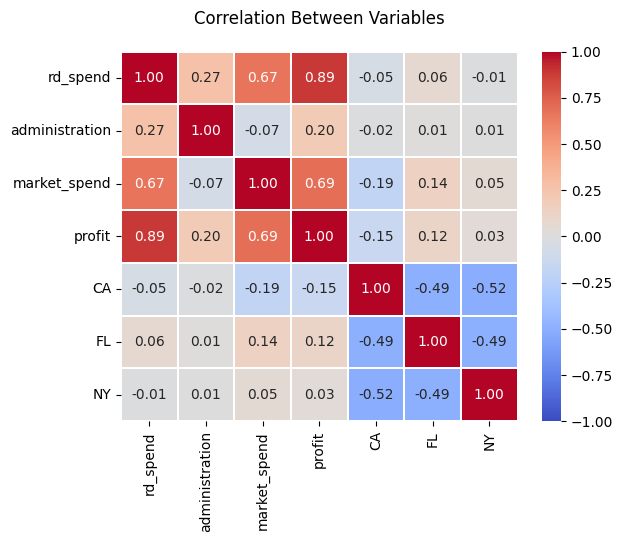

In [ ]:
corr = df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, cmap = 'coolwarm', annot=True, fmt='.2f', linewidths=0.1)
plt.title("Correlation Between Variables", pad=20)

## Beginning to create our model:

In [ ]:
feature_columns = ['rd_spend', 'administration', 'market_spend'] # note -- omitting states to begin with due to the lack of correlation shown above
X = df[feature_columns]
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(50, 3)


In [ ]:
y = df['profit']
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(50,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37, 3)
(13, 3)
(37,)
(13,)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(model.intercept_)
print(model.coef_)

37258.270892895336
[0.54024574 0.05559787 0.1210661 ]


In [ ]:
equation = zip(feature_columns, model.coef_)
print(model.intercept_)
print(list(equation))

37258.270892895336
[('rd_spend', 0.5402457353289047), ('administration', 0.05559786683073892), ('market_spend', 0.12106609734919171)]


#### Interpreting our first model's coefficients:
y = 37258.27 + (.5402 x rd_spend) + (.0556 x administration) + (.1211 x market_spend)

#### Making predictions:

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print("Root Mean Squared Error: %.2f" % (math.sqrt(mean_squared_error(y_test, y_pred))))
print("R2 Score: %.2f" % r2_score(y_test, y_pred))

Root Mean Squared Error: 16317.08
R2 Score: 0.85


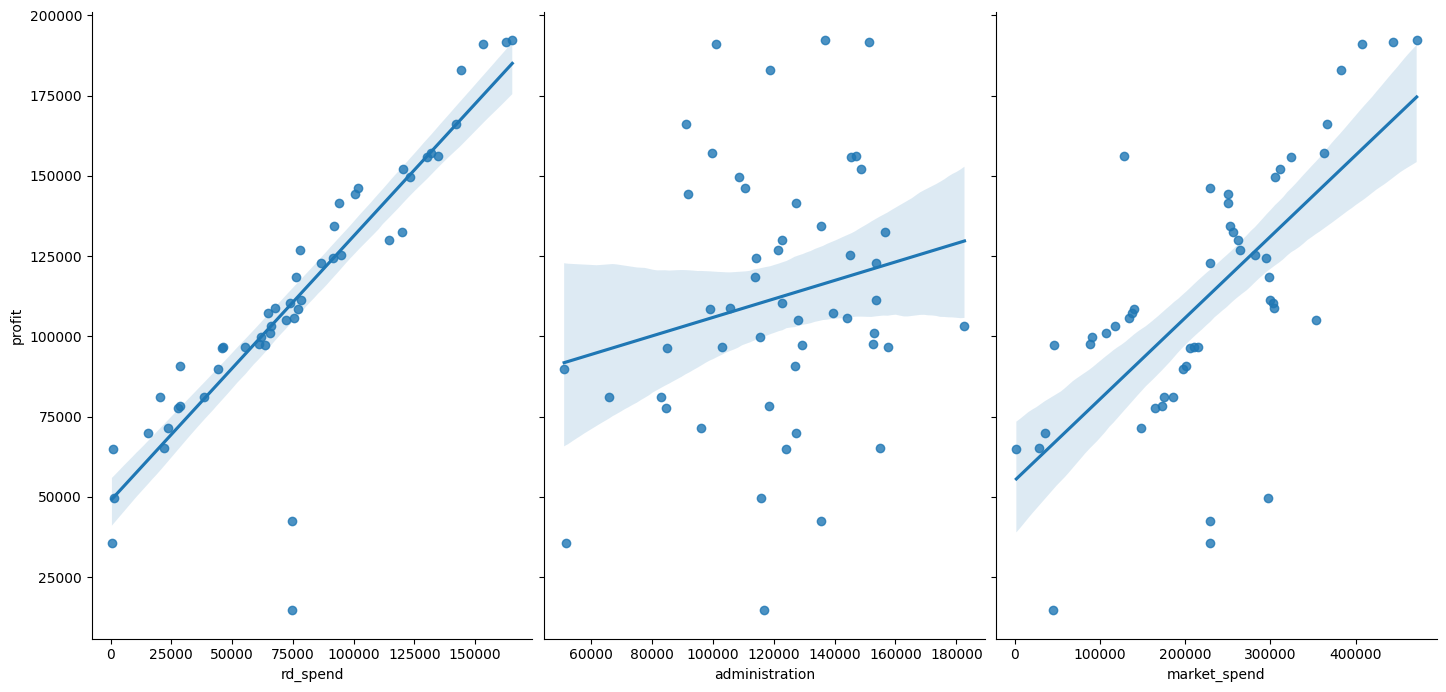

In [ ]:
import seaborn as sns
sns.pairplot(df, x_vars=feature_columns, y_vars='profit', height=7, aspect=0.7, kind='reg')

#### How to interpret what we're seeing with our models and these visualizations of the relationship between the features and target:

1. There is a STRONG relationship between rd_spend and profit. This is seen in the plot above as well as with the .5402 coefficient.
2. There is a VERY WEAK relationship between administration and profit. This is seen in the plot above as well with the .0556 coefficient.
3. There is a WEAK relationship between market_spend and profit. This is seen in the plot above as well as with the .1211 coefficient.

#### So what happens when we remove the administration feature from our model?

Root Mean Squared Error: 16177.38
R2 Score: 0.85


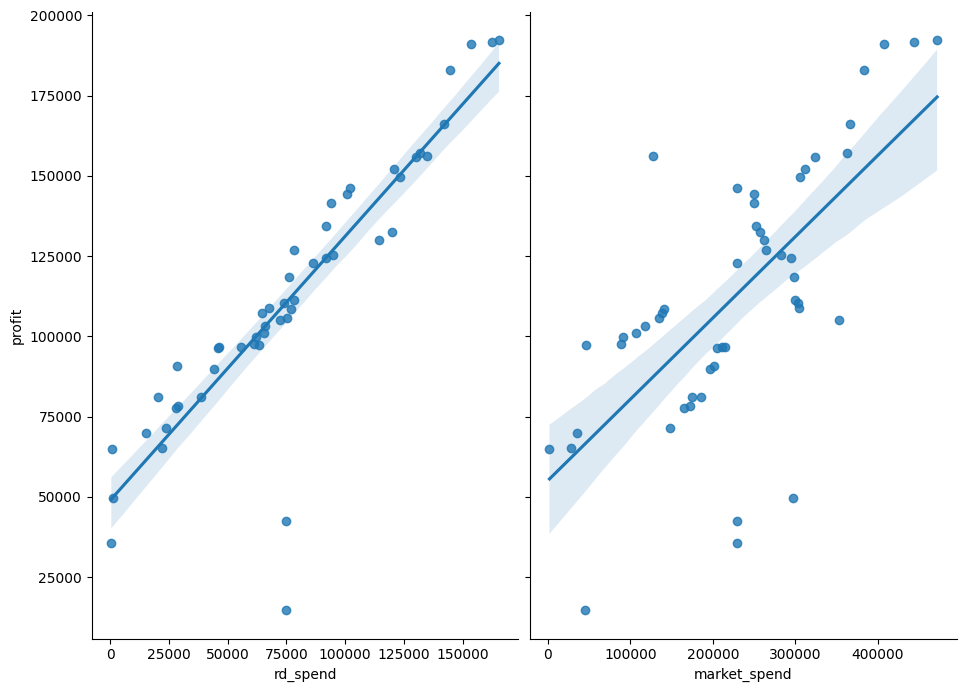

In [ ]:
feature_columns = ['rd_spend', 'market_spend']
X = df[feature_columns]
y = df['profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Root Mean Squared Error: %.2f" % (math.sqrt(mean_squared_error(y_test, y_pred))))
print("R2 Score: %.2f" % r2_score(y_test, y_pred))

sns.pairplot(df, x_vars=feature_columns, y_vars='profit', height=7, aspect=0.7, kind='reg')

#### Our Root Mean Squared Error reduces slightly from 16317.08 to 16177.38, however, our R2 Score remains the same at .85 This would mean that administration cost has virtually no impact on the amount of profit a startup earns.

#### K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, random_state=1, shuffle=True)

scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=1)

print(f"Mean RMSE: {np.sqrt(np.mean(np.absolute(scores)))}")

Mean RMSE: 19830.9873503969


#### An interesting result of performing cross-validation using KFold is that the mean RMSE obtained from it is greater than the one from the initial run of my model with just the first training and test sets.